In [104]:
import os
import pickle as pkl
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
SNTYPES = ['Ib','IIb','Ic','Ic-bl', 'Ibn']
bands = ['U','B','V', 'g', 'R', 'I', 'rp','ip','up','J','H','K','m2','w1','w2']
colorTypes = {'IIb':'FireBrick',
             'Ib':'SteelBlue',
             'Ic':'DarkGreen',
             'Ic-bl':'DarkOrange',
             'Ibn':'purple',
             'Ibc': 'black'}

Reading the templates files

In [106]:
with open('all_templates.pkl', 'rb') as f:
    u = pkl._Unpickler(f)
    u.encoding = 'latin1'
    tmpl = u.load()

Rolling Median Templates

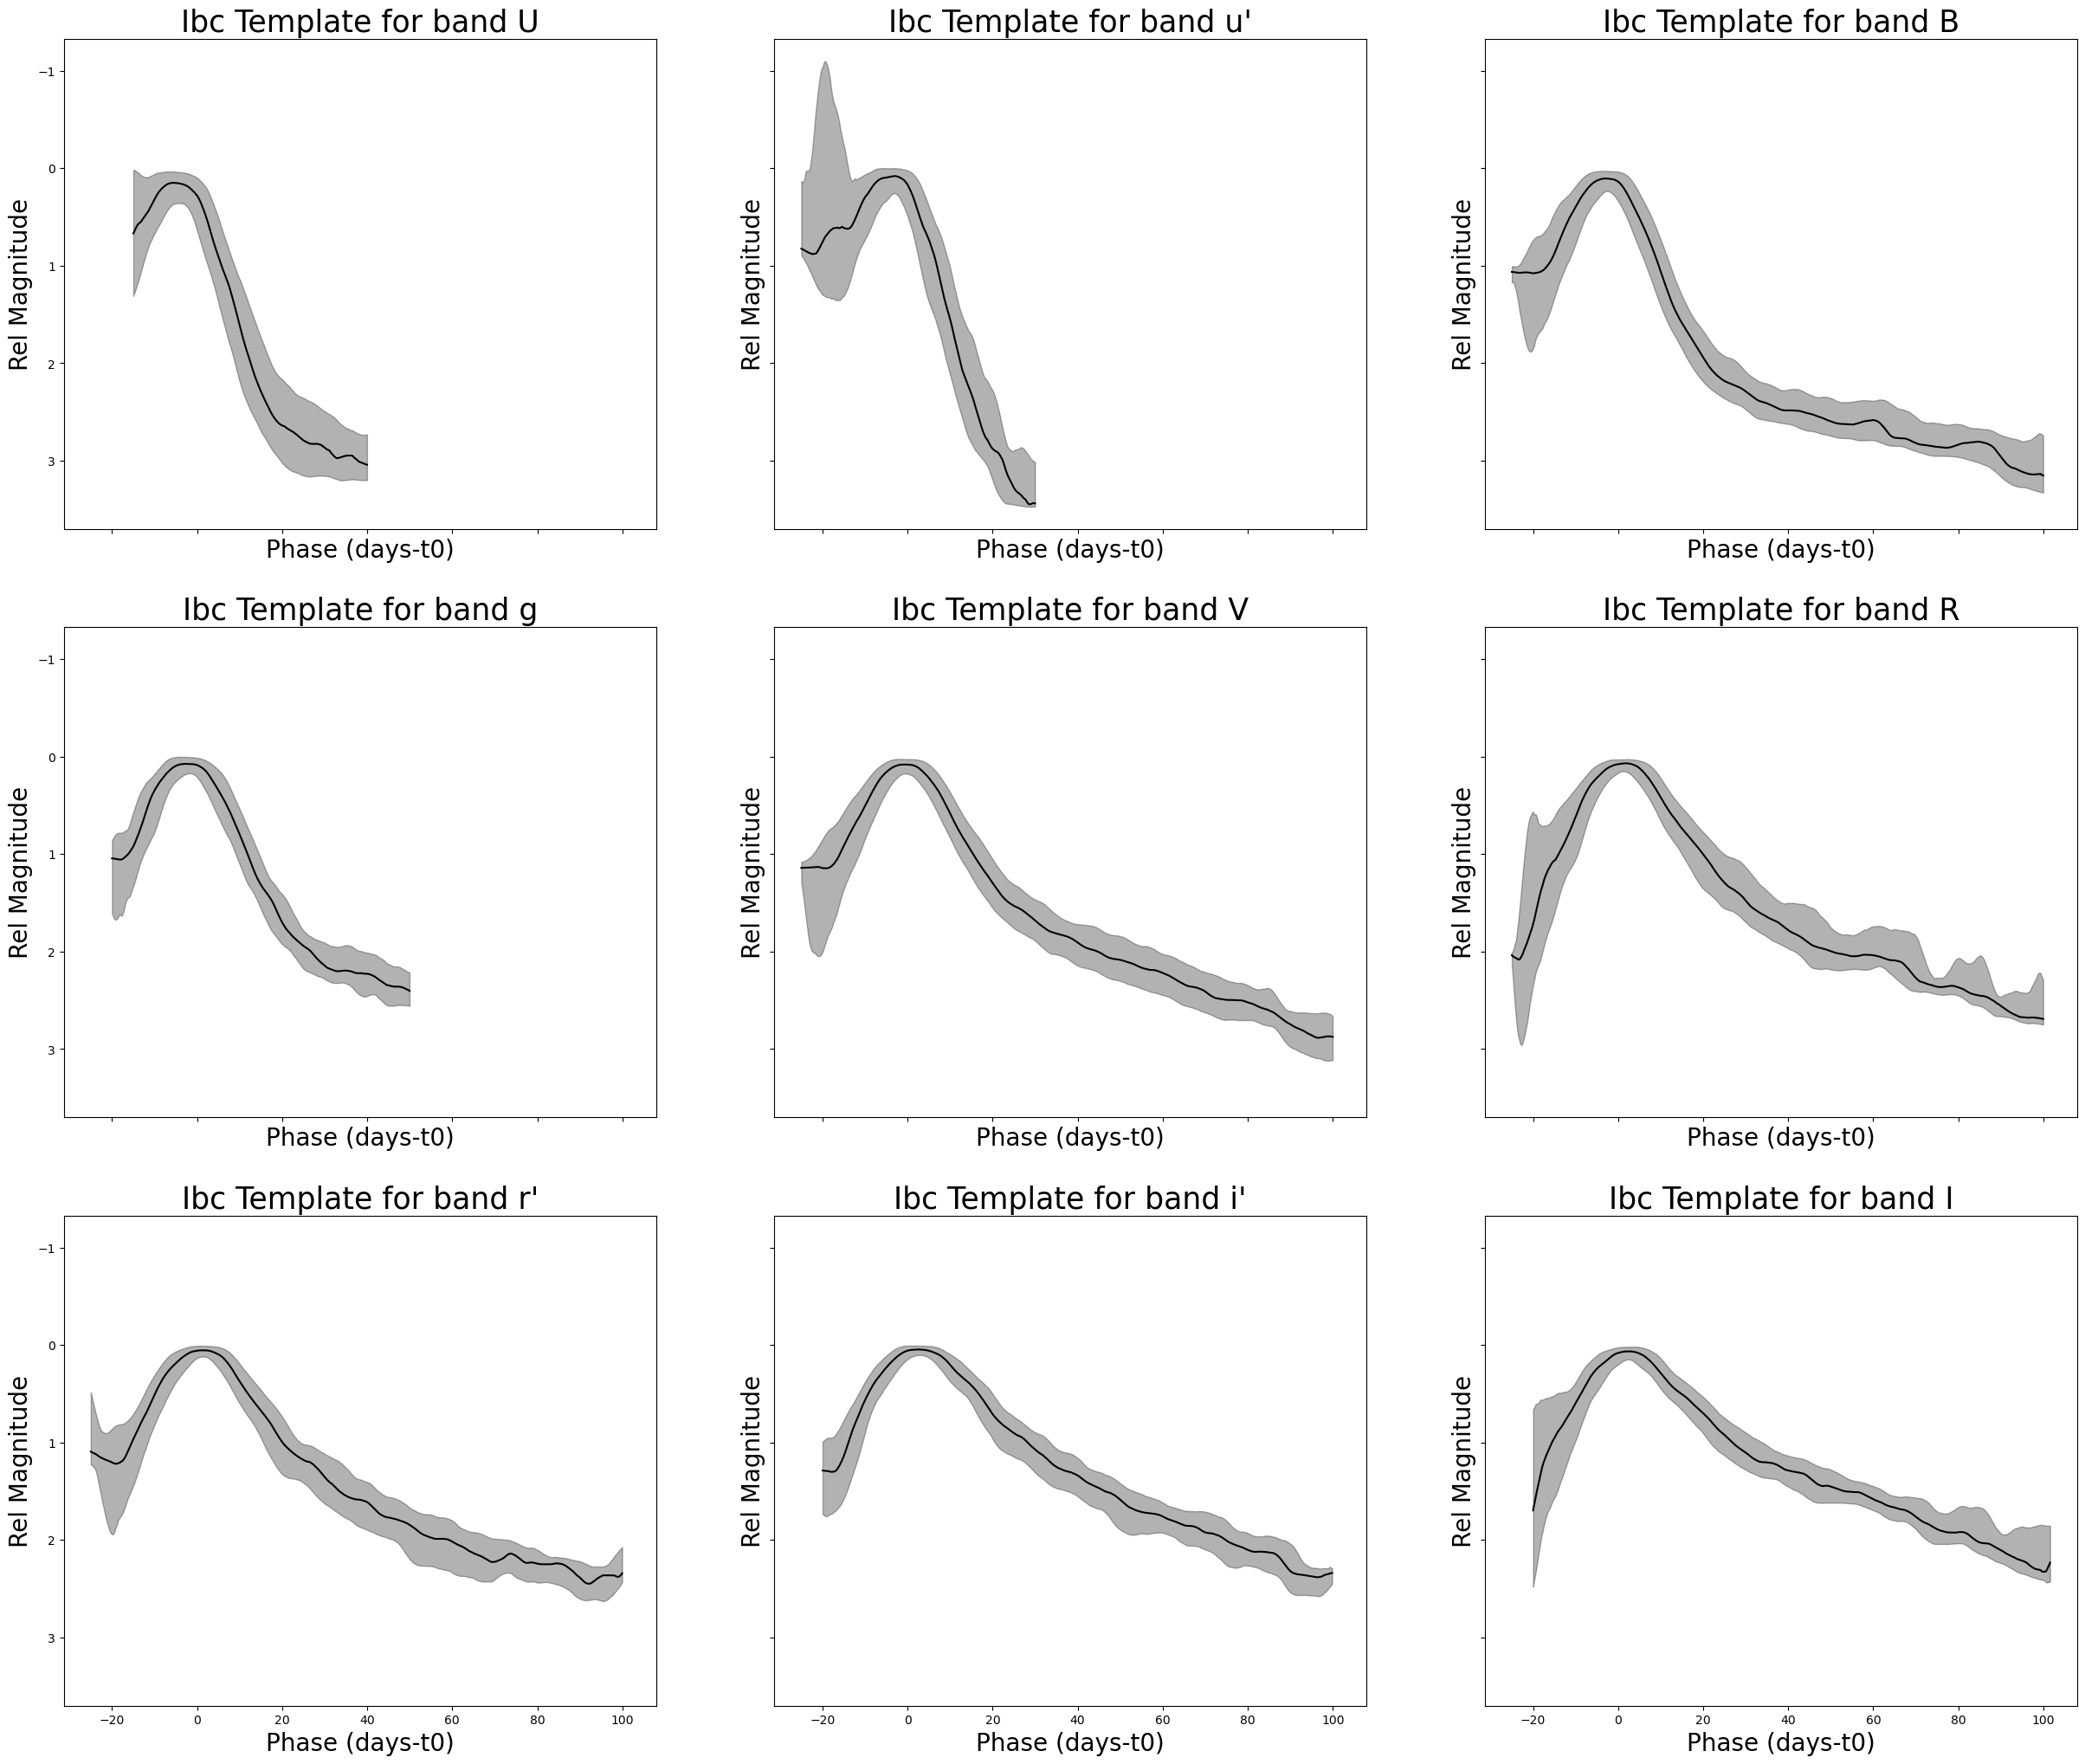

In [107]:
# Plotting an example of the Ibc templates
fig, ax = plt.subplots(3,3, sharex = True, sharey = True, figsize=(30,25))
optical_bands = ['U', 'u', 'B','g', 'V', 'R', 'r', 'i', 'I']
SNTYPE = 'Ibc'
for i, bb in enumerate(optical_bands):
    b_ = bb
    if bb == 'i' or bb == 'r' or bb == 'u':
        b_ = bb+ str("'")
        bb = bb + str('p')
    
    np.concatenate(ax)[i].plot(tmpl[bb]['Ibc']['phs'], tmpl[bb]['Ibc']['med_smoothed'], color=colorTypes[SNTYPE]) 
    np.concatenate(ax)[i].fill_between(tmpl[bb]['Ibc']['phs'], tmpl[bb]['Ibc']['pc25_smoothed'],
                    tmpl[bb]['Ibc']['pc75_smoothed'], alpha=0.3, color=colorTypes[SNTYPE])
    # plt.axvline(0)
    np.concatenate(ax)[i].set_title('Ibc Template for band '+b_ , size=25)
    np.concatenate(ax)[i].set_ylabel('Rel Magnitude', size=20)
    np.concatenate(ax)[i].set_xlabel('Phase (days-t0)', size=20)
    np.concatenate(ax)[i].invert_yaxis()

GP Templates

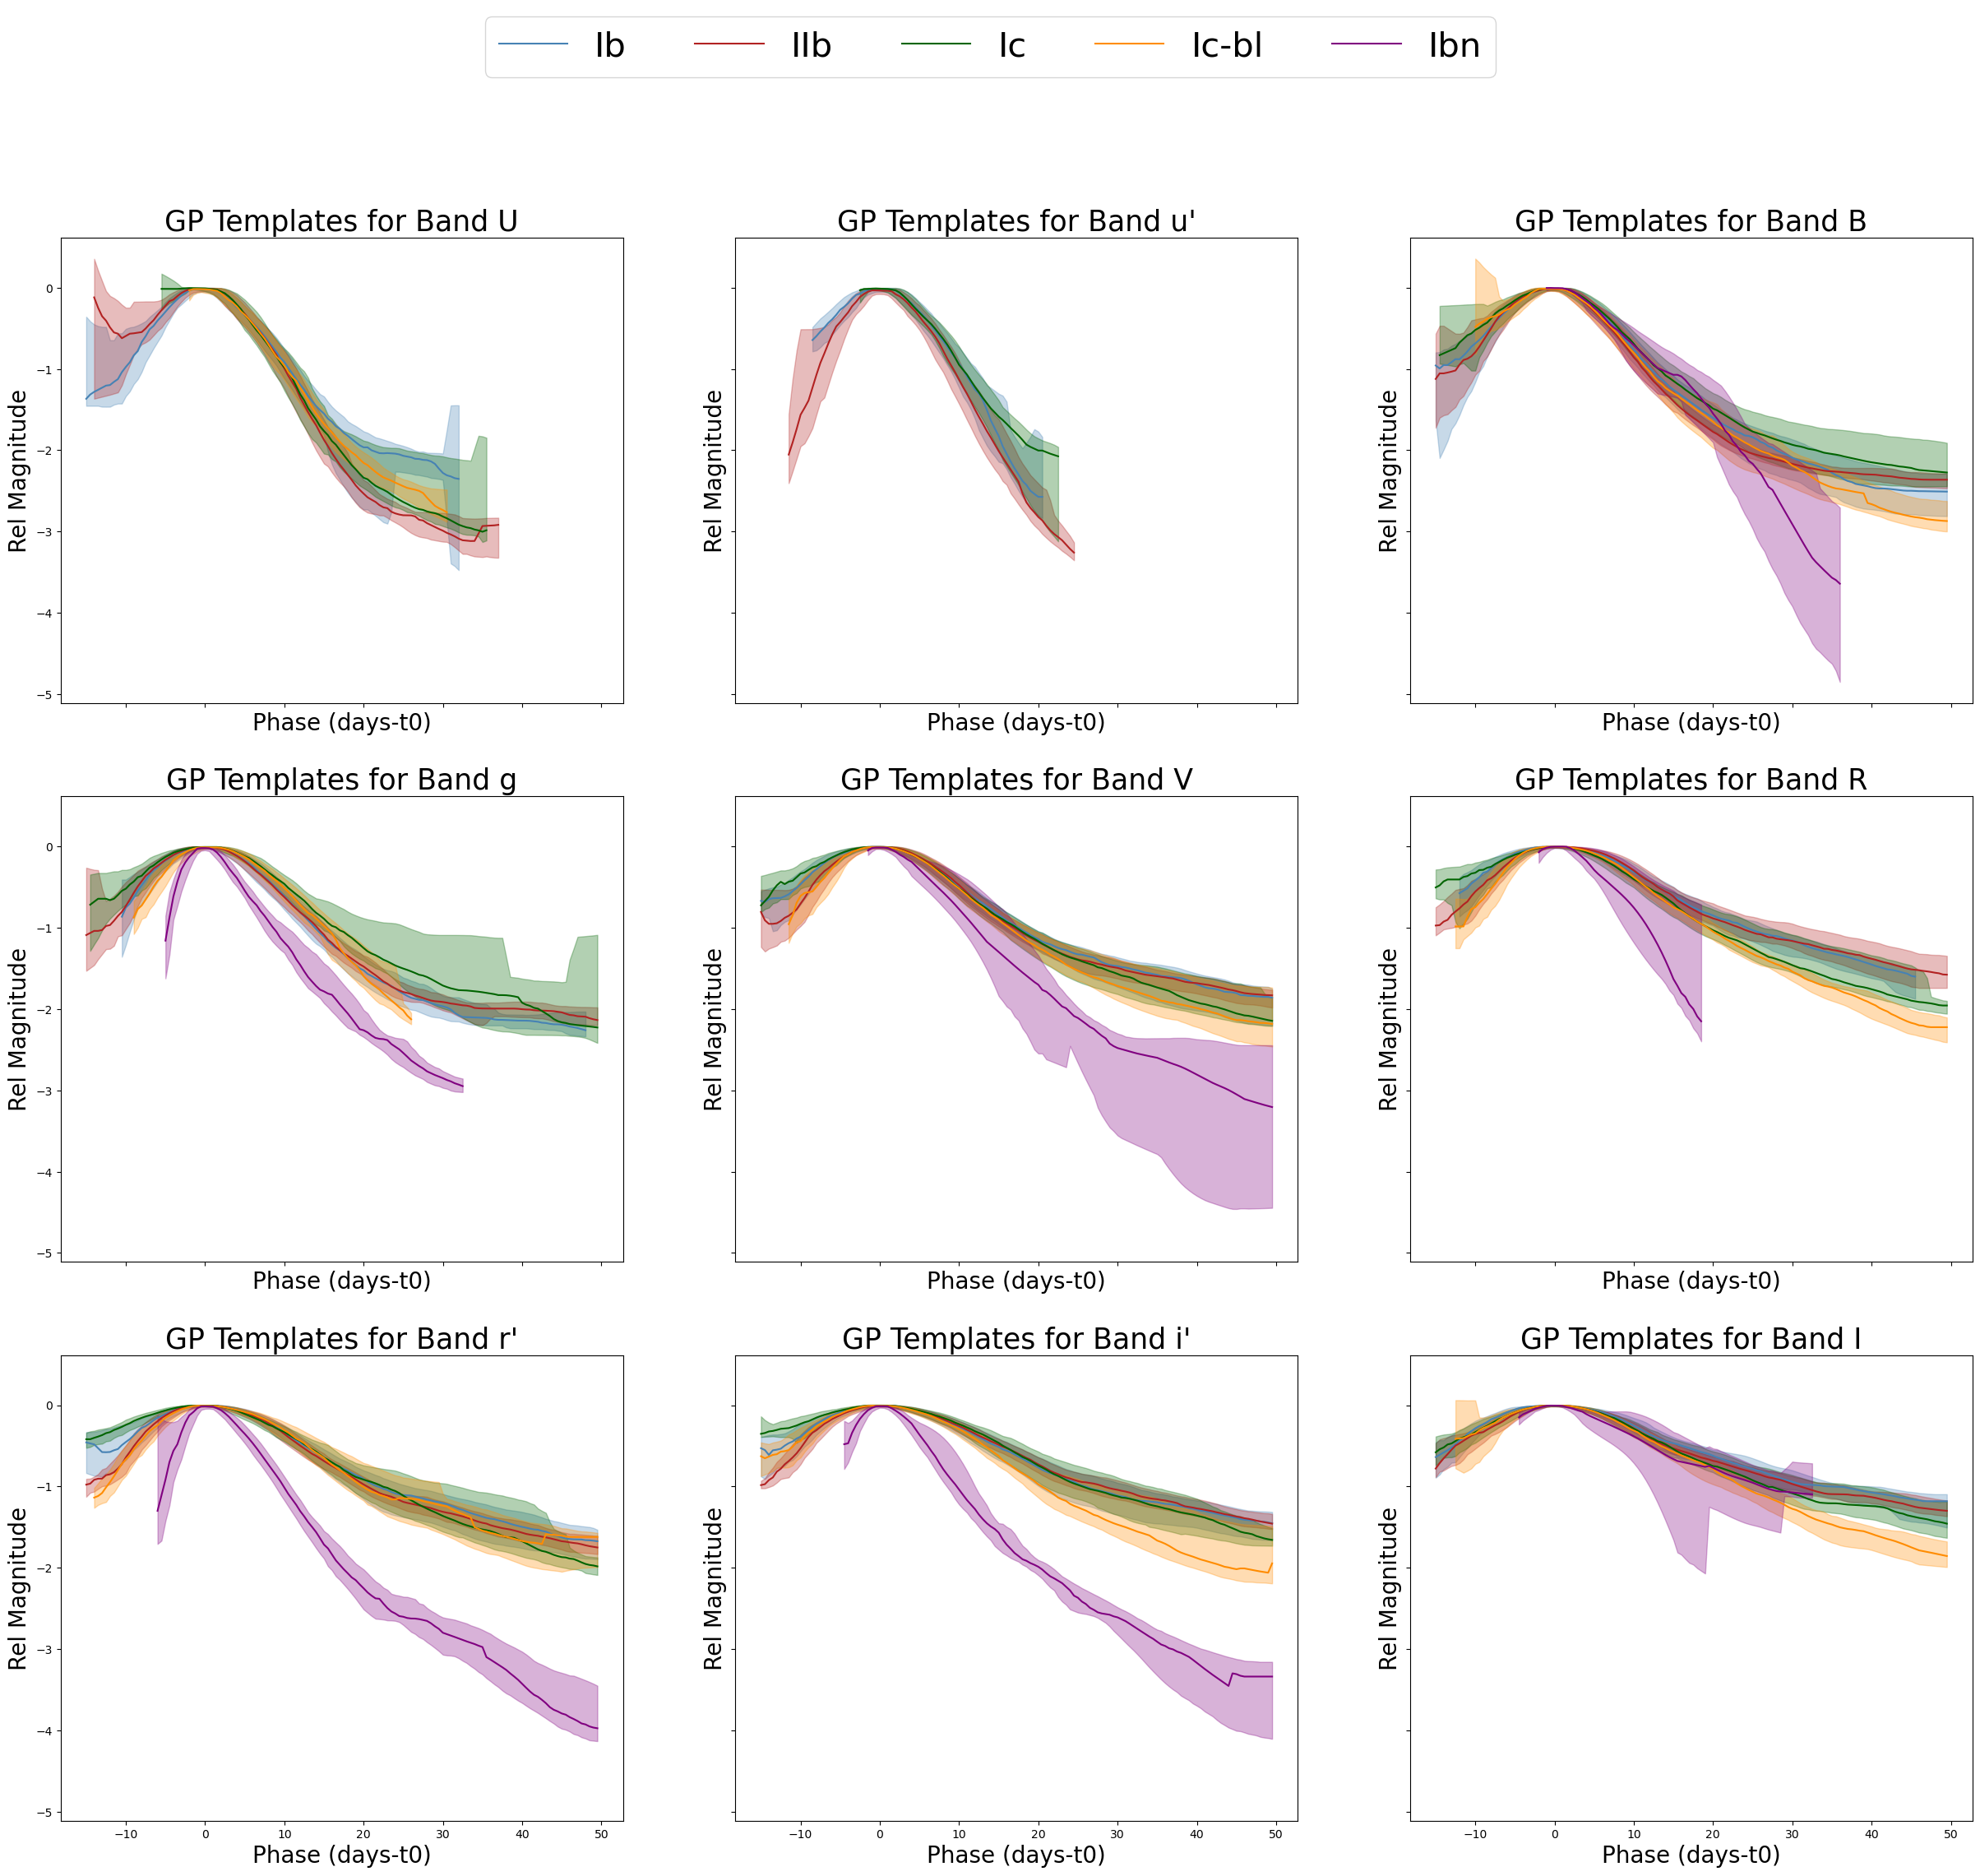

In [108]:
# Plotting an example of the 
fig, ax = plt.subplots(3,3, sharex = True, sharey = True, figsize=(30,25))
optical_bands = ['U', 'u', 'B','g', 'V', 'R', 'r', 'i', 'I']
for i, bb in enumerate(optical_bands):
    b_ = bb
    for SNTYPE in SNTYPES:
        if bb == 'i' or bb == 'r' or bb == 'u':
            b_ = bb+ str("'")
            bb = bb + str('p')
#         SNTYPE = 'Ib'
#         bb = 'B'
        if len(tmpl[bb][SNTYPE])==0:
            continue
        np.concatenate(ax)[i].plot(tmpl[bb][SNTYPE]['t'], 
                                   tmpl[bb][SNTYPE]['rollingMedian'], 
                                   color=colorTypes[SNTYPE],
                                   label = SNTYPE) 
        np.concatenate(ax)[i].fill_between(tmpl[bb][SNTYPE]['t'], tmpl[bb][SNTYPE]['rollingPc25'],
                        tmpl[bb][SNTYPE]['rollingPc75'], alpha=0.3, color=colorTypes[SNTYPE])
        np.concatenate(ax)[i].set_title('GP Templates for Band ' + b_, size=25)

        np.concatenate(ax)[i].set_ylabel('Rel Magnitude', size=20)
        np.concatenate(ax)[i].set_xlabel('Phase (days-t0)', size=20)
        
handles, labels = np.concatenate(ax)[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=5, prop={'size':30})

PLASTCC light curves